In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
train_path =r"E:\ASSIGNMENTS_DEEP_LEARNIGN\Assignment_1\Train"
test_path = r"E:\ASSIGNMENTS_DEEP_LEARNIGN\Assignment_1\Test"

In [4]:
cv2.imread(r"E:\ASSIGNMENTS_DEEP_LEARNIGN\Assignment_1\Train\Good\good-a1ef5a32-fe6f-11ed-981d-5c60ba7633ae_jpg.rf.5e6a342c58f121406b22a8bf15bd3a02.jpg").shape

(640, 640, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [6]:
train = train.flow_from_directory(
                                    train_path,
                                    target_size=(48,48),
                                    class_mode='categorical',
                                    batch_size=32
                                 )

Found 739 images belonging to 5 classes.


In [7]:
test = test.flow_from_directory(
                                    test_path,
                                    target_size=(48,48),
                                    class_mode='categorical',
                                    batch_size=32
                                 )

Found 54 images belonging to 5 classes.


In [8]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [10]:
# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    
    Conv2D(128, (3, 3), activation='relu'),
    
    MaxPool2D(2, 2),
    
    Flatten(),
    
    Dense(units=512, activation='relu'),
    
    Dense(units=5, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                    

In [12]:
md=model.fit(train, epochs=10,batch_size=32)

Epoch 1/10
24/24 [==============================] - 13s 488ms/step - loss: 1.3215 - accuracy: 0.4303
Epoch 2/10
24/24 [==============================] - 7s 269ms/step - loss: 0.7333 - accuracy: 0.7321
Epoch 3/10
24/24 [==============================] - 7s 280ms/step - loss: 0.4796 - accuracy: 0.8187
Epoch 4/10
24/24 [==============================] - 6s 267ms/step - loss: 0.3579 - accuracy: 0.8728
Epoch 5/10
24/24 [==============================] - 6s 266ms/step - loss: 0.2375 - accuracy: 0.9175
Epoch 6/10
24/24 [==============================] - 6s 265ms/step - loss: 0.2399 - accuracy: 0.9080
Epoch 7/10
24/24 [==============================] - 7s 282ms/step - loss: 0.1736 - accuracy: 0.9445
Epoch 8/10
24/24 [==============================] - 6s 263ms/step - loss: 0.1551 - accuracy: 0.9499
Epoch 9/10
24/24 [==============================] - 7s 270ms/step - loss: 0.0842 - accuracy: 0.9702
Epoch 10/10
24/24 [==============================] - 7s 271ms/step - loss: 0.1524 - accuracy: 0.948

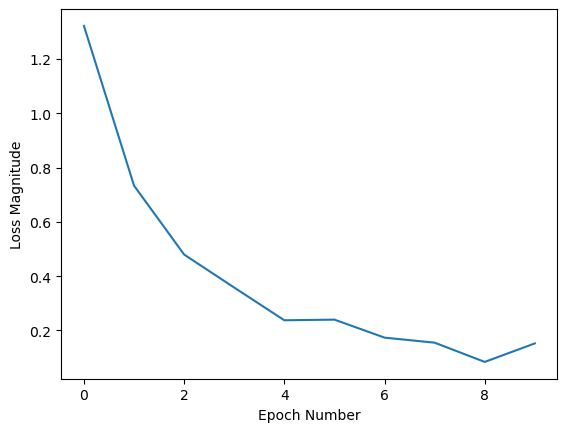

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(md.history['loss'])


In [14]:
loss,accuracy= model.evaluate(test)

2/2 [==============================] - 1s 334ms/step - loss: 0.3105 - accuracy: 0.9259


In [15]:
print("Accuracy of test data : ",accuracy*100,"%")

Accuracy of test data :  92.59259104728699 %


In [16]:
print("Loss of test data : ",loss)

Loss of test data :  0.31051990389823914


In [22]:
model.save("E:\ASSIGNMENTS_DEEP_LEARNIGN\Assignment_1\Model.h5")